In [21]:

# imaging with more data; template from wk2 folder
import astropy 
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import ascii
from scipy.signal import convolve2d

FWHM = 0.07913 
sigma_FWHM = FWHM / 2.355
HWHM = FWHM / 2
sigma_HWHM = HWHM/ 1.177



#put all the component fits files into an array
component_array = ["1088284872", "1088284992", "1088285112", "1088285232", "1088285600",  "1088285720", "1088285848", "1088285968", "1088286088", "1088286208", "1088286336"]

# opens up the txt file 'more_data' and reads all the fits file names from that. 
more_data = open('/Users/georgiaalexakis/ToR - GitHub Repository/radio-eyes/wk3/more_data.txt', 'r')
more_data_shit = [line.split( ) for line in more_data.readlines()]

# adds the more_data array at the end of the component_array
for h in more_data_shit:
    component_array = np.append(component_array, more_data_shit)

for i in component_array:
    components = '/Users/georgiaalexakis/ToR - GitHub Repository/radio-eyes/wk3/more_data/' + i +'_components.fits'

    hdu_list = fits.open(components, memmap=True)

    info_array = hdu_list[1].data

    ra = info_array['RIGHTASCENSION']
    dec = info_array['DECLINATION']
    flux = info_array['FLUXI']
    #used eyed instead of id since id is already a taken name
    eyed = info_array['ID']
    
    # appropriate range for ra is [340,10] which goes over the 360 boundary, to mitigate this we add an offset such that the effective ra range is [-20, 10]!
    ra[ra>180] -= 360


    # here i am setting up the initial data in the array by putting the data from the first fits file in the array.
    if component_array[0] == i:
        ra_overall = ra
        dec_overall = dec
        eyed_overall = eyed
        flux_overall = flux
    #for all else, it appends to the new variable to make a REALLY BIG ARRAY OF EVERYTHING EVER
    else:
        ra_overall = np.append(ra_overall, ra)
        dec_overall = np.append(dec_overall, dec)
        eyed_overall = np.append(eyed_overall, eyed)
        flux_overall = np.append(flux_overall, flux)



#represents the total number of observations
n_obs = len(component_array)

def pixelate(ra_zoom, dec_zoom, n_bins, ra_overall, dec_overall, eyed_overall, flux_overall):

    #Check to see which dimension is larger so that a square in ra,dec can 
    #be returned
    if (ra_zoom[1]-ra_zoom[0]) > (dec_zoom[1]-dec_zoom[0]):
        zoom = ra_zoom
    else:
        zoom = dec_zoom

    #Find the size of the bins using the largest dimension and the num of bins
    binsize = (zoom[1]-zoom[0])/n_bins

    #Create arrays for ra and dec that give the left side of each pixel
    ra_bin_array = np.multiply(range(n_bins), binsize) + ra_zoom[0]
    dec_bin_array = np.multiply(range(n_bins), binsize) + dec_zoom[0]

    #Create an empty array of pixels to be filled in the for loops
    pixels = np.zeros((len(ra_bin_array),len(dec_bin_array)))

    #Histogram components into ra bins
    ra_histogram = np.digitize(ra_overall,ra_bin_array)

    #Begin for loop over both dimensions of pixels, starting with ra
    for bin_i in range(len(ra_bin_array) - 2):

        #Find the indices that fall into the current ra bin slice
        ra_inds = np.where(ra_histogram == bin_i)

        #Go to next for cycle if no indices fall into current ra bin slice
        if len(ra_inds) == 0:
            continue

        #Histogram components that fall into the current ra bin slice by dec
        dec_histogram = np.digitize(dec_overall[ra_inds],dec_bin_array)

        #Begin for loop by dec over ra bin slice
        for bin_j in range(len(dec_bin_array) - 2):
            
            #Find the indicies that fall into the current dec bin
            dec_inds = np.where(dec_histogram == bin_j)

            #Go to next for cycle if no indices fall into current dec bin			
            if len(dec_inds) == 0:
                continue

            #Sum the flux components that fall into current ra/dec bin
            pixels[bin_i,bin_j] = np.sum(flux_overall[(ra_inds[0])[dec_inds[0]]])

    #Find the pixel centers in ra/dec for plotting purposes
    ra_pixel_centers = np.multiply(range(n_bins),binsize) + ra_zoom[0] + binsize/2.
    dec_pixel_centers = np.multiply(range(n_bins),binsize) + dec_zoom[0] + binsize/2.

    return pixels, ra_pixel_centers, dec_pixel_centers


22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


/var/folders/lh/gjdx4kyj4m9f7bzk50cysp6r0000gn/T/ipykernel_8136/4044022135.py:69: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.transpose(np.log(conv_image)), interpolation = "nearest", origin = "lower", cmap = "plasma",


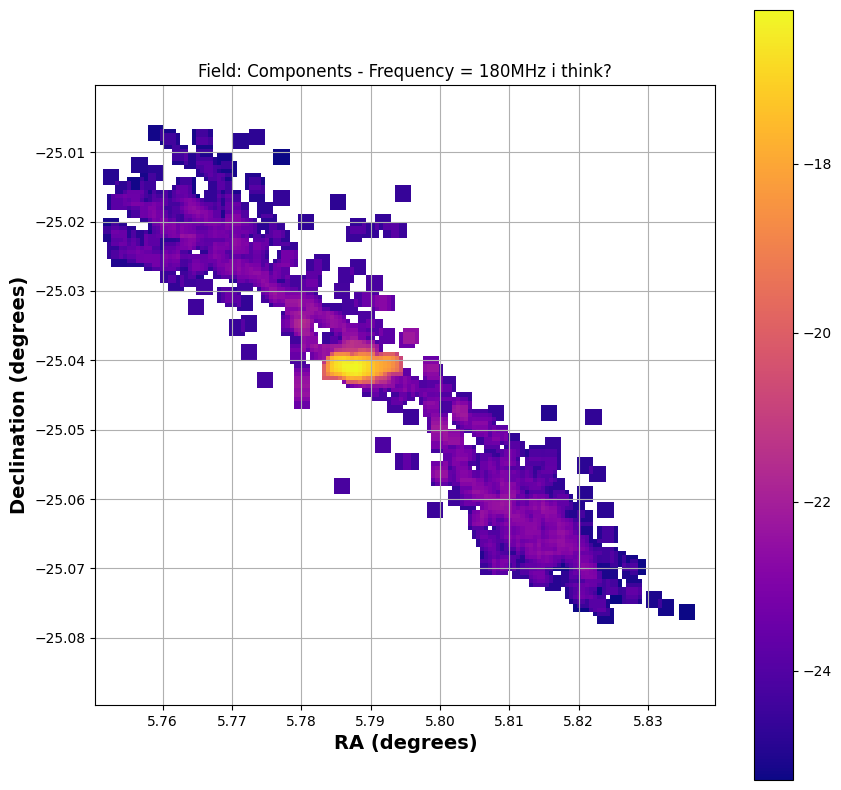

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


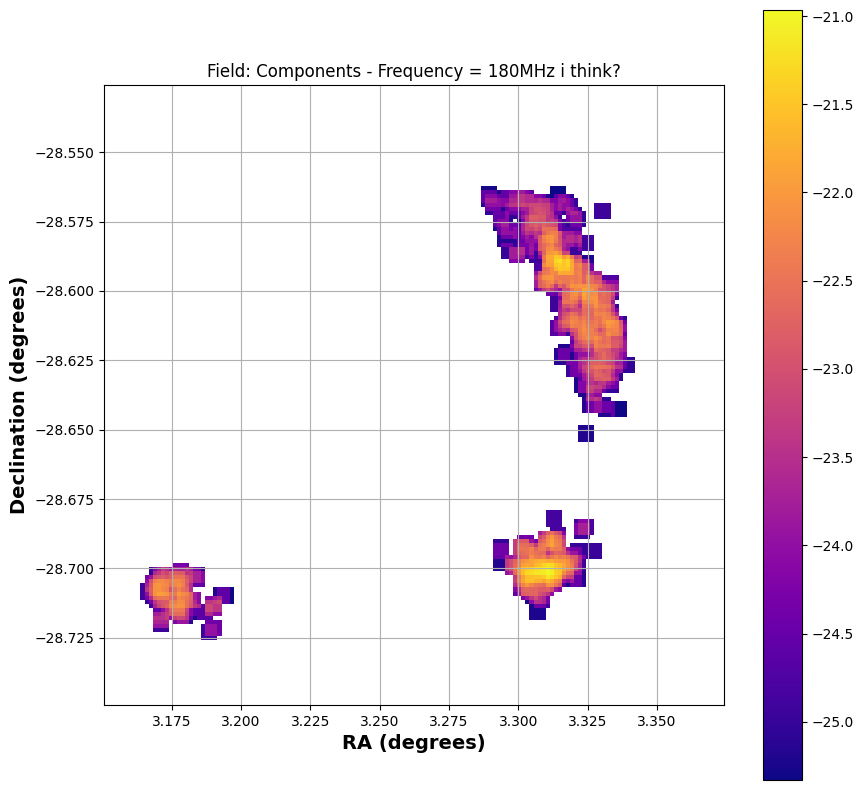

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


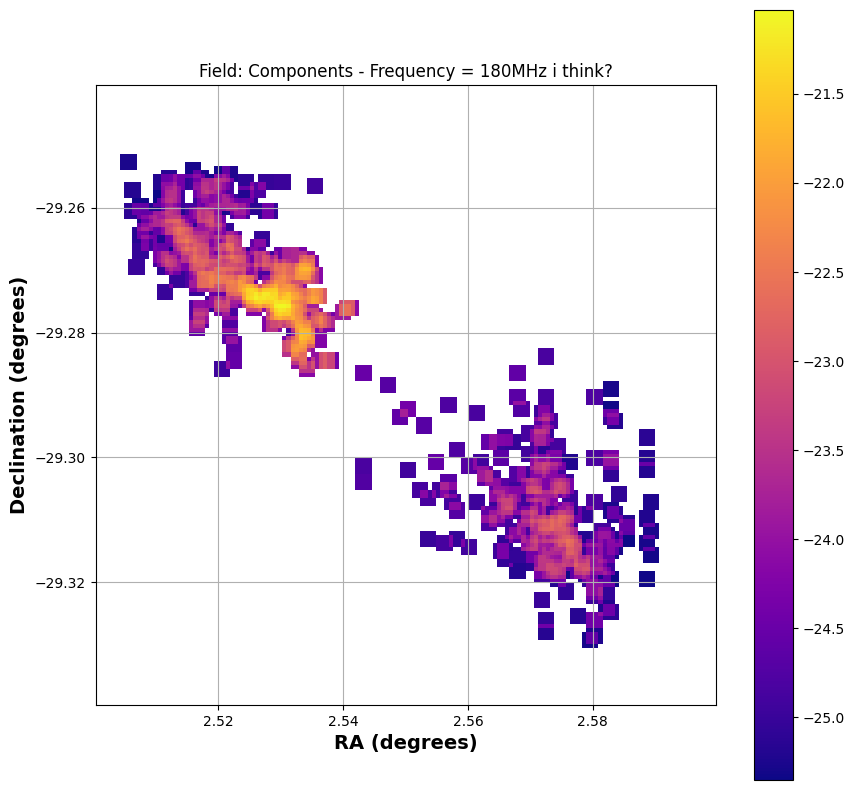

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


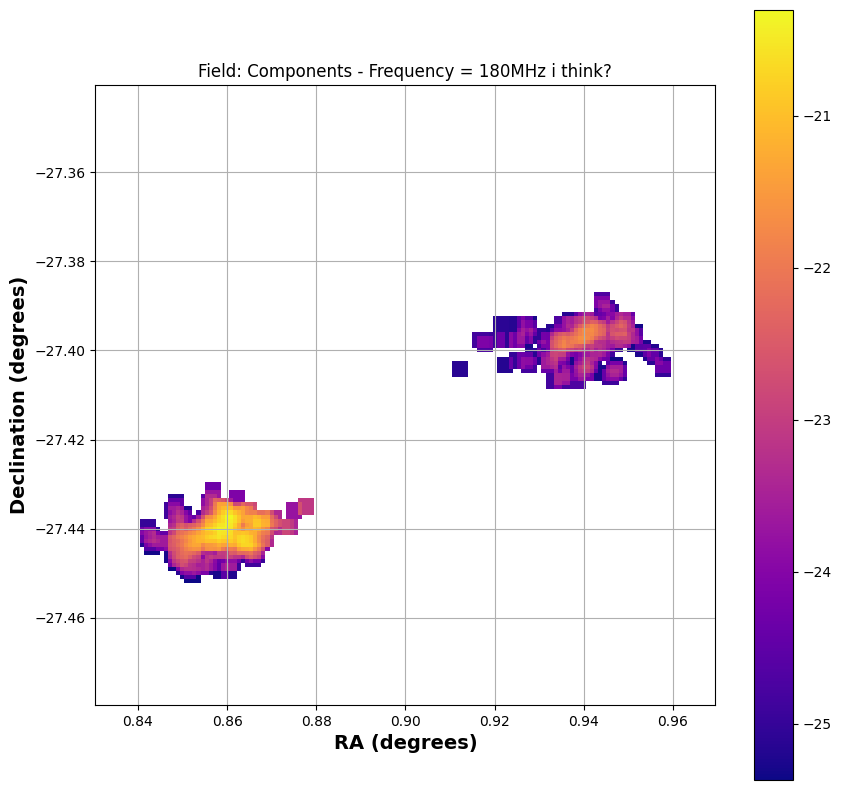

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


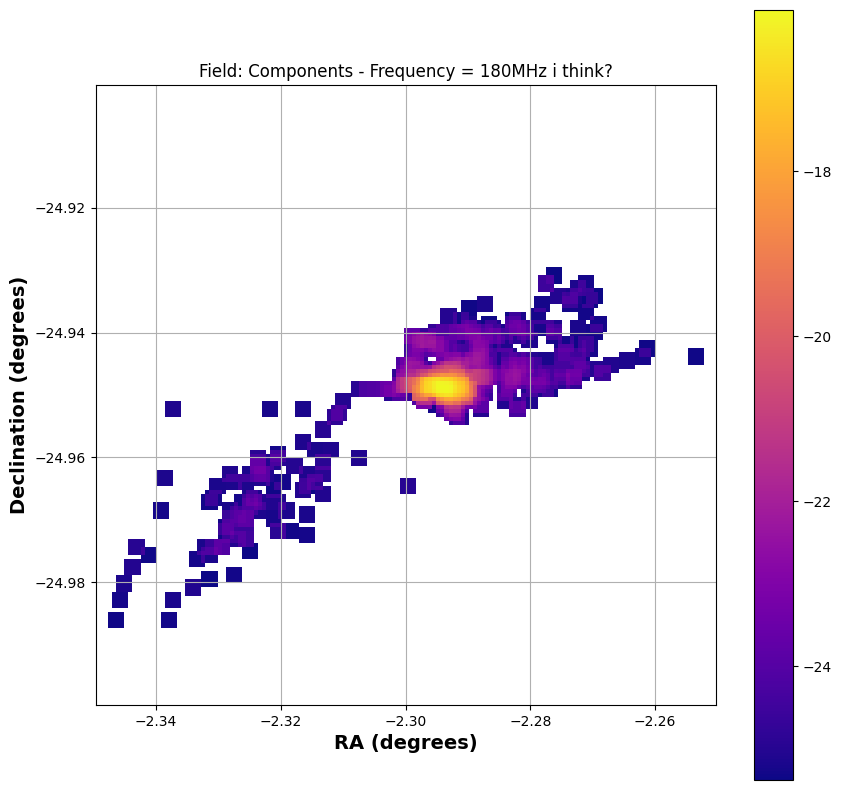

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


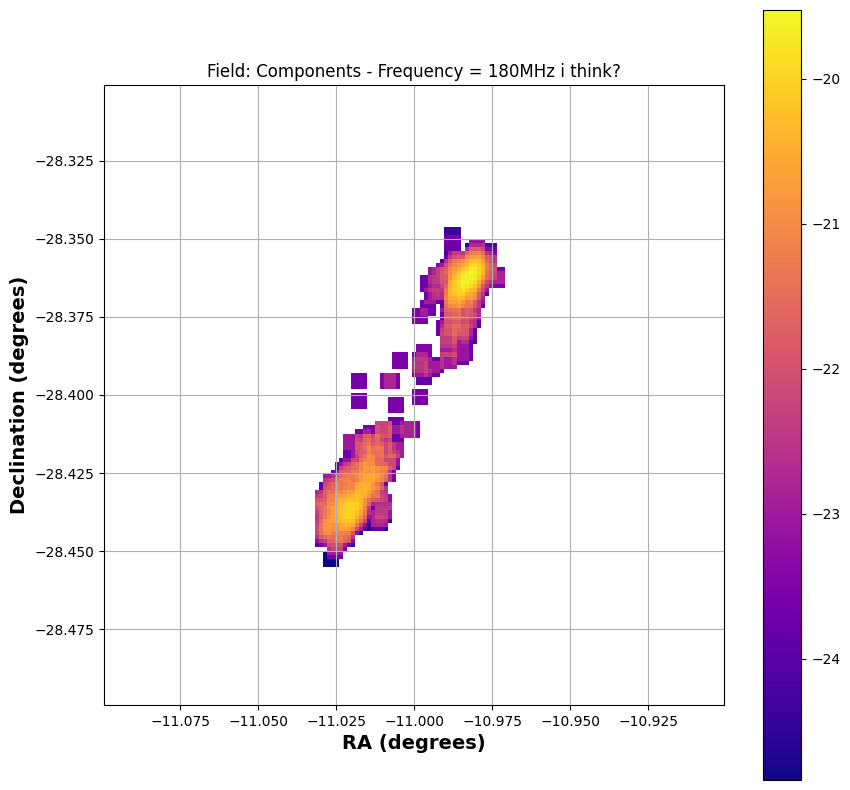

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


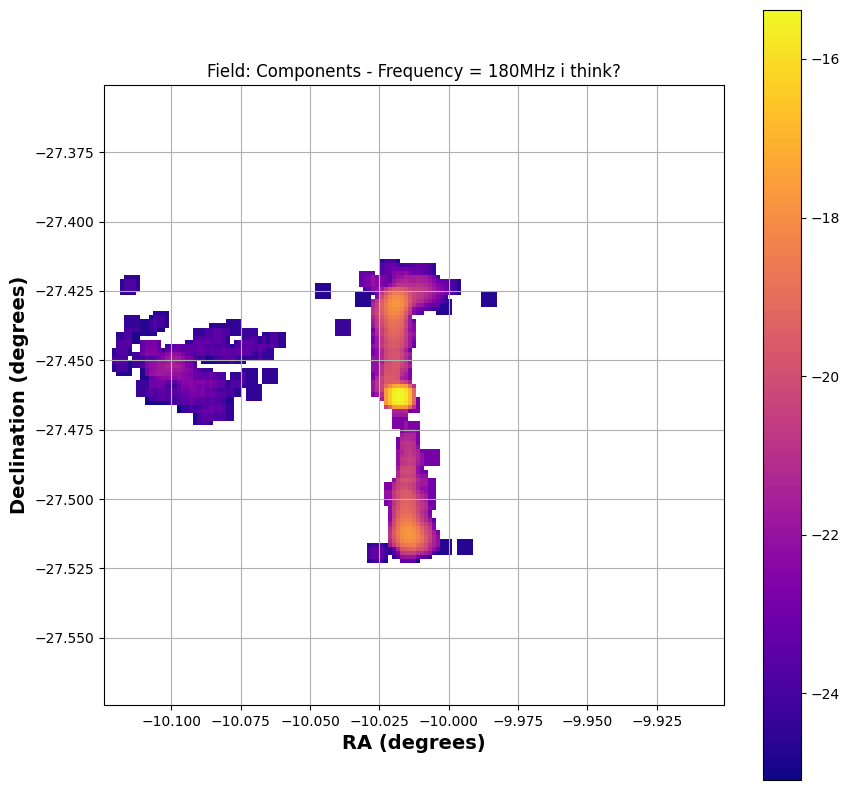

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


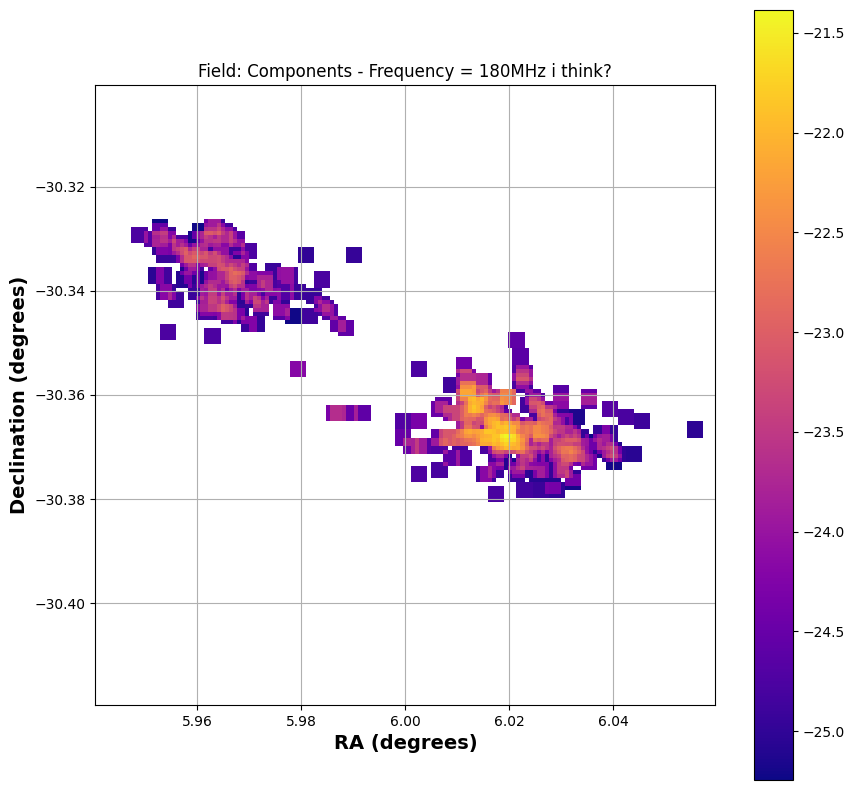

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


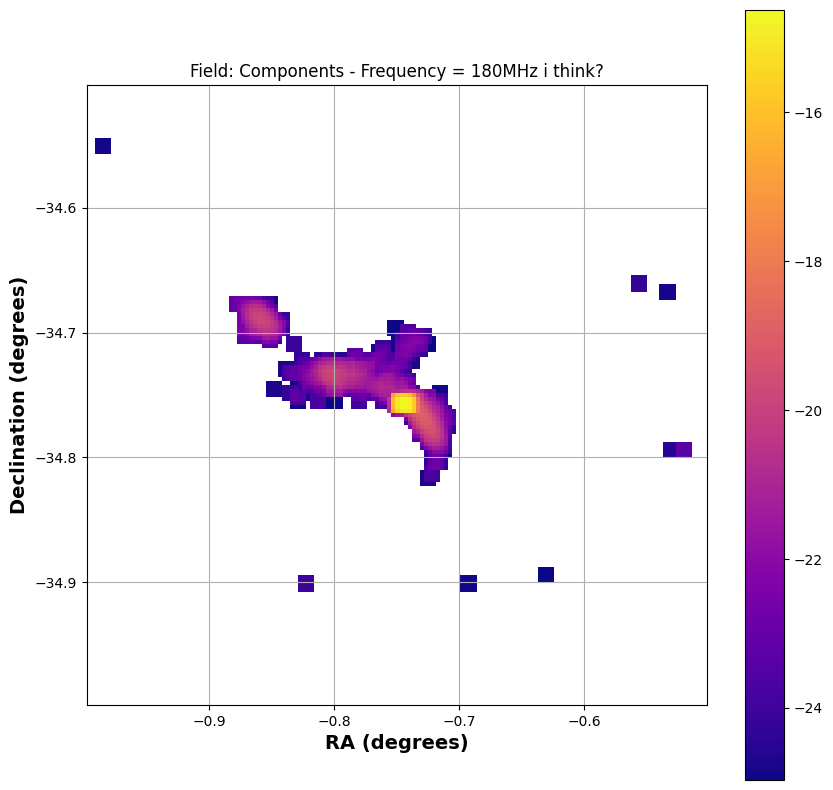

22500
exp: [[-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-1.76994830e-08 -3.53989660e-09 -3.53989660e-09 -1.76994830e-08]
 [-3.18590694e-08 -1.76994830e-08 -1.76994830e-08 -3.18590694e-08]]
kernel [[0.99999997 0.99999998 0.99999998 0.99999997]
 [0.99999998 1.         1.         0.99999998]
 [0.99999998 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 0.99999997]]
normalized kernel, multi. amplitutde: [[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]] [[2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698511e-06 2.96698516e-06 2.96698516e-06 2.96698511e-06]
 [2.96698507e-06 2.96698511e-06 2.96698511e-06 2.96698507e-06]]


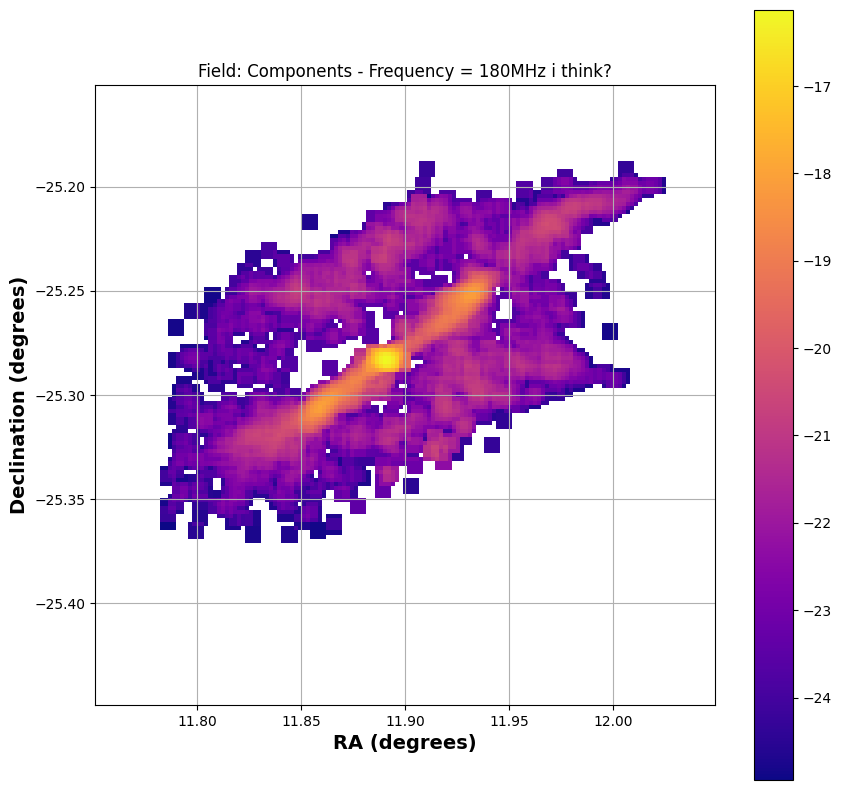

In [38]:
def gaussian_kernel(size, new_sigma):
    # make 1D array of equally spaced intervals
    array = np.linspace((-(size - 1) / 2), ((size - 1) / 2), size)
    # turns 1D array into 2D Kernel thingy
    x, y = np.meshgrid(array, array)
    kernel = np.exp(-0.5 * (np.square(x) + np.square(y)) / np.square(new_sigma))
    amplitutde = 1/(new_sigma*np.sqrt(2*np.pi))
    print("exp:",( -0.5 * (np.square(x) + np.square(y)) / np.square(new_sigma)))
    print("kernel", kernel)
    s = kernel / np.sum(kernel)
    a = s * amplitutde

    print("normalized kernel, multi. amplitutde:", s, a)
    return a


#for loop here to loop through all the sources
#centre the sources so each source is the same number of pixels and therefore has the same ra and dec [5.95, 6.05]

ra_sources = [[5.75, 5.84], [3.15, 3.375], [2.50, 2.60], [0.83, 0.97], [-2.35, -2.25], [-11.10, -10.90], [-10.125, -9.90], [5.94, 6.06], [-1.00, -0.50], [11.75, 12.05]]
dec_sources = [[-25.09,-25], [-28.75,-28.525], [-29.34,-29.24],[-27.48,-27.34],[-25,-24.9], [-28.5,-28.3],[-27.575,-27.35 ], [-30.42,-30.3],[-35,-34.5], [-25.45, -25.15]]
n_bins = 150

#create a loop to find the difference between the 2nd and first components of each element in the array to find the degree range
degree_range = []
for pair in dec_sources:
    diff = pair[1] - pair[0]
    degree_range.append(diff)

counter = 0

for ra_zoom, dec_zoom in zip(ra_sources, dec_sources):

    range_of_ra_dec = np.where((ra_overall >= ra_zoom[0]) & (ra_overall <= ra_zoom[1]) & (dec_overall >= dec_zoom[0]) & (dec_overall <= dec_zoom[1]))
    
    new_ra = ra_overall[range_of_ra_dec]
    new_dec = dec_overall[range_of_ra_dec]
    new_flux = flux_overall[range_of_ra_dec]
    new_eyed = eyed_overall[range_of_ra_dec]



    (pixels, ra_pixel_centers, dec_pixel_centers) = pixelate(ra_zoom, dec_zoom, n_bins, new_ra, new_dec, new_eyed, new_flux)

    pixels2 = pixels / n_obs
    num = np.size(pixels2)
    print(num)

# divide num of pixels by the degree range so wehave pixels/deg then multiply with sigma_HWHM so we have the sigma in the unit of pixels then pass that through the function
    new_sigma =  (num / degree_range[counter]) * sigma_HWHM
    counter += counter

    size = 4 
    kernel = gaussian_kernel(size, new_sigma)
    conv_image = convolve2d(pixels2,kernel)



#dec as y, ra as x

#figsize scales the plot, in this case i chose 10,10 square so its relatively big and easy to see!
    plt.figure(figsize=(10,10))

#imshow is a type of plot that shows the image (duh)
#took the log of the flux scale which made things happen
#interpolation made the pixels not fuzzy
#origin reoriented the y axis so it goes from 0 to 100 instead of 100 to 0
#cmap changed the colorbar so that the colors are sequentially dark-light in relation to flux
    plt.imshow(np.transpose(np.log(conv_image)), interpolation = "nearest", origin = "lower", cmap = "plasma", 
           extent = [ra_pixel_centers[0], ra_pixel_centers[len(ra_pixel_centers)-1], 
           dec_pixel_centers[0], dec_pixel_centers[len(dec_pixel_centers)-1]])

#the x and y axis labels are not accurate right now but that's okay :)
    plt.xlabel('RA (degrees)', fontweight='bold', size=14)
    plt.ylabel('Declination (degrees)', fontweight='bold', size=14)
    plt.title('Field: Components - Frequency = 180MHz i think?')

    plt.colorbar()
    plt.grid()
    plt.show()

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0

/var/folders/lh/gjdx4kyj4m9f7bzk50cysp6r0000gn/T/ipykernel_3868/3579841431.py:16: RuntimeWarning: invalid value encountered in divide
  return total_kernel / np.sum(total_kernel)


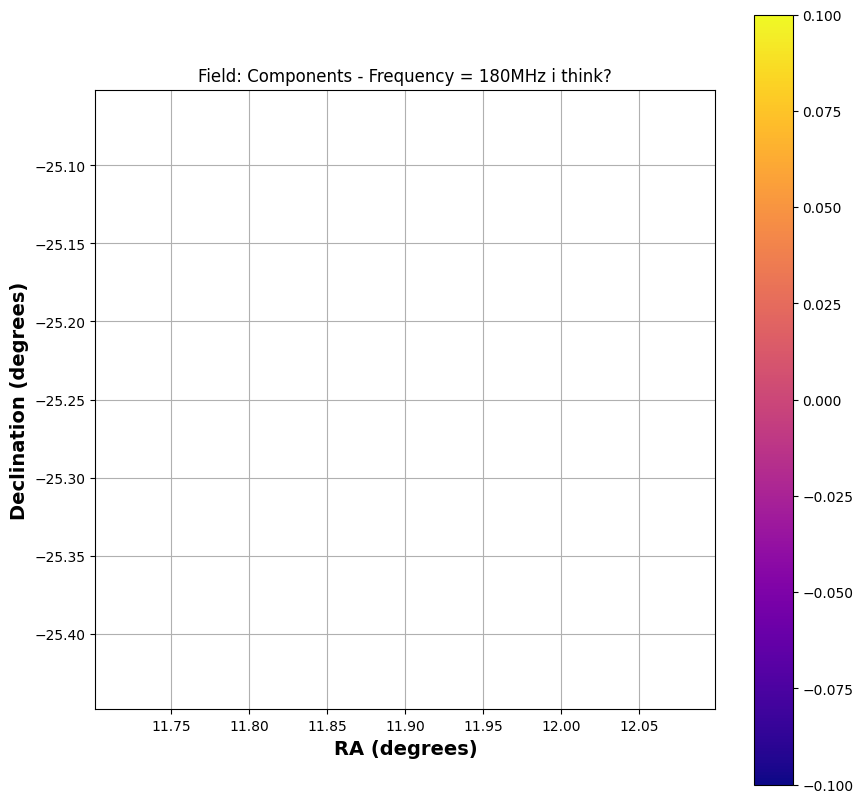

In [12]:
# centering gaussian on pixel centers

def gaussian_pixel_centre(size, sigma_HWHM, ra_pixel_centers, dec_pixel_centers):
    array = np.linspace((-(size - 1) / 2), ((size - 1) / 2), size)
    x, y = np.meshgrid(array, array)

    total_kernel = np.zeros_like(x)

    for ra, dec in zip(ra_pixel_centers, dec_pixel_centers):
        kernel = np.exp(-0.5 * ((x - ra) ** 2 + (y - dec) ** 2) / sigma_HWHM**2)
        total_kernel += kernel
    
    
    return total_kernel / np.sum(total_kernel)

def convolved_pixels(image, sigma_HWHM):
    kernel_size = int(6 * sigma_HWHM)  # Usually 6 times sigma gives a good size
    ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    
    gaussian_conv_kernel = np.exp(-0.5 * (xx**2 + yy**2) / sigma_HWHM**2)
    gaussian_conv_kernel /= np.sum(gaussian_conv_kernel)  # Normalize

    # Perform the convolution using convolve2d
    convolved_image = convolve2d(image, gaussian_conv_kernel, mode='same', boundary='fill', fillvalue=0)
    
    return convolved_image



kernel1 = gaussian_pixel_centre(size, sigma_HWHM, ra_pixel_centers, dec_pixel_centers)
test = convolve2d(pixels2, kernel1)


#figsize scales the plot, in this case i chose 10,10 square so its relatively big and easy to see!
plt.figure(figsize=(10,10))

#imshow is a type of plot that shows the image (duh)
#took the log of the flux scale which made things happen
#interpolation made the pixels not fuzzy
#origin reoriented the y axis so it goes from 0 to 100 instead of 100 to 0
#cmap changed the colorbar so that the colors are sequentially dark-light in relation to flux
plt.imshow(np.transpose(np.log(test)), interpolation = "nearest", origin = "lower", cmap = "plasma", 
           extent = [ra_pixel_centers[0], ra_pixel_centers[len(ra_pixel_centers)-1], 
           dec_pixel_centers[0], dec_pixel_centers[len(dec_pixel_centers)-1]])

#the x and y axis labels are not accurate right now but that's okay :)
plt.xlabel('RA (degrees)', fontweight='bold', size=14)
plt.ylabel('Declination (degrees)', fontweight='bold', size=14)
plt.title('Field: Components - Frequency = 180MHz i think?')

plt.colorbar()
plt.grid()
plt.show()